In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/refs/heads/main/datasets/online_shoppers_intention.csv"

In [4]:
df = pd.read_csv(DATASET)

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
len(df)

12330

# Проверяю ошибки в написании номинативных переменных

In [ ]:
df['Revenue'].value_counts()

,count
Revenue,
False,10422
True,1908


In [ ]:
df['Month'].value_counts() # Ошибка в написании август

,count
Month,
May,3348
Nov,2980
Mar,1897
Dec,1713
Oct,545
Sep,446
Aug,431
Jul,429
June,288


In [6]:
df['Month'] = df['Month'].replace('aug', 'Aug') # Исправляю

In [ ]:
df['Month'].value_counts() # Готово

,count
Month,
May,3348
Nov,2980
Mar,1897
Dec,1713
Oct,545
Aug,501
Sep,446
Jul,429
June,288


In [ ]:
df['VisitorType'].value_counts()

,count
VisitorType,
Returning_Visitor,10551
New_Visitor,1694
Other,85


In [ ]:
df['Weekend'].value_counts()

,count
Weekend,
False,9462
True,2868


# Проверка на пустые значения

In [ ]:
df.isna().mean()

,0
Administrative,0.000000
Administrative_Duration,0.000000
Informational,0.000000
Informational_Duration,0.016139
ProductRelated,0.000000
ProductRelated_Duration,0.039822
BounceRates,0.000000
ExitRates,0.008029
PageValues,0.000000
SpecialDay,0.000000


Text(0.5, 1.0, 'Distributions')

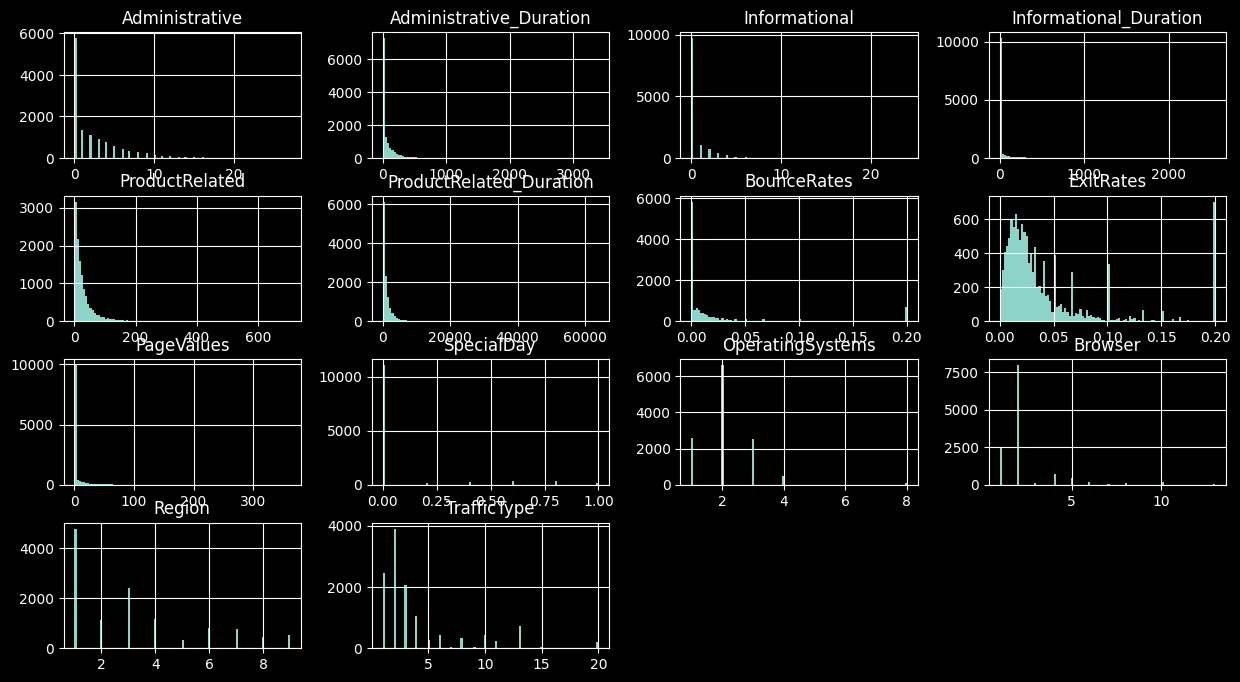

In [ ]:
df.hist(bins=100, figsize=(15,8))
plt.title(label='Distributions', fontsize=3)

Распределения всех переменных не являются нормальными

In [7]:
inf_dur_median = df['Informational_Duration'].median() # считаю медиану

In [8]:
prod_rel_median = df['ProductRelated_Duration'].median() # считаю медиану

In [9]:
ex_rates_median = df['ExitRates'].median() # считаю медиану

In [10]:
df['Informational_Duration'] = df['Informational_Duration'].fillna(inf_dur_median)
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].fillna(prod_rel_median)
df['ExitRates'] = df['ExitRates'].fillna(ex_rates_median) # заменил пропуски на медиану

In [ ]:
df.isna().mean() # пропусков нет

,0
Administrative,0.0
Administrative_Duration,0.0
Informational,0.0
Informational_Duration,0.0
ProductRelated,0.0
ProductRelated_Duration,0.0
BounceRates,0.0
ExitRates,0.0
PageValues,0.0
SpecialDay,0.0


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<Figure size 1600x1600 with 0 Axes>

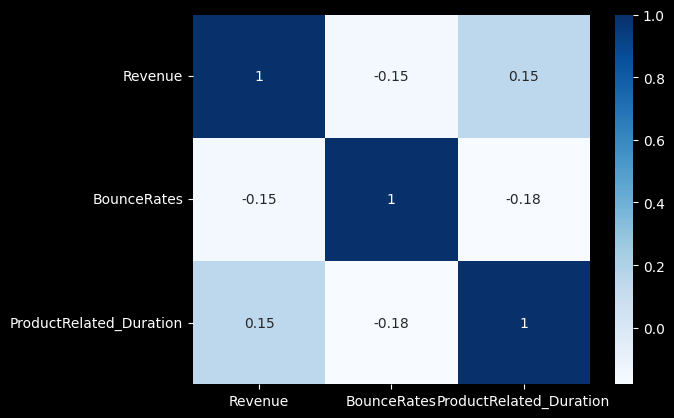

<Figure size 1600x1600 with 0 Axes>

In [ ]:
corr = df[['Revenue', 'BounceRates', 'ProductRelated_Duration']] \
    .corr(numeric_only=True)
sns.heatmap(corr, cmap='Blues', annot=True)
plt.figure(figsize=(16,16))

<Figure size 1600x1600 with 0 Axes>

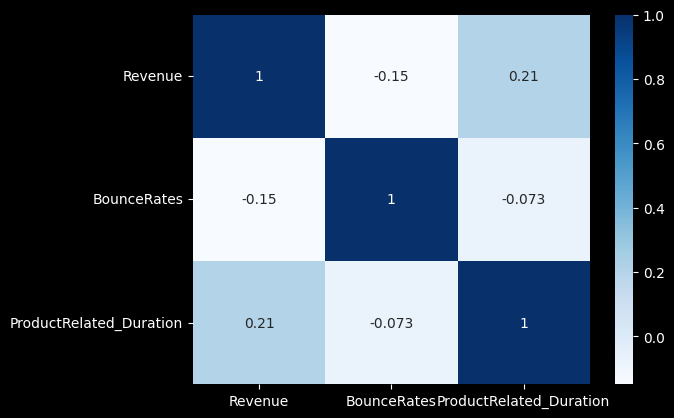

<Figure size 1600x1600 with 0 Axes>

In [ ]:
corr = df[['Revenue', 'BounceRates', 'ProductRelated_Duration']] \
    .corr(method='spearman', numeric_only=True)
sns.heatmap(corr, cmap='Blues', annot=True)
plt.figure(figsize=(16,16))

<Figure size 1600x1600 with 0 Axes>

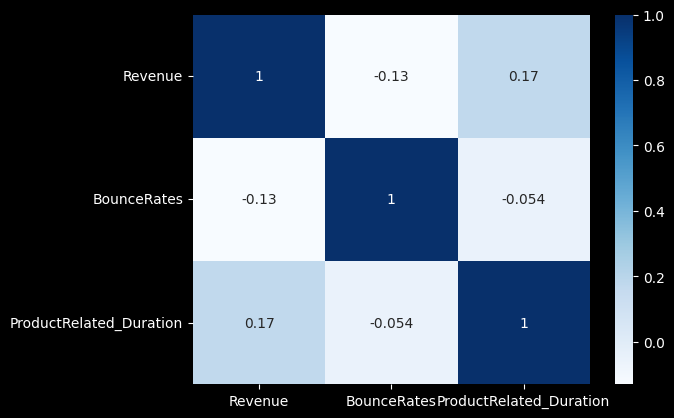

<Figure size 1600x1600 with 0 Axes>

In [ ]:
corr = df[['Revenue', 'BounceRates', 'ProductRelated_Duration']] \
    .corr(method='kendall', numeric_only=True)
sns.heatmap(corr, cmap='Blues', annot=True)
plt.figure(figsize=(16,16))

Корреляция целевой переменной Revenue с числовыми переменными мала. Выше всего она с BounceRates и с ProductRelated_Duration. Эти показатели влияют на решение пользователя совершить покупку

In [ ]:
df_cat = df[['SpecialDay', 'Month', 'VisitorType', 'Weekend',
             'OperatingSystems', 'Browser', 'Region', 'TrafficType']]

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
for col in df_cat.columns:
  t = pd.crosstab(df['Revenue'], df_cat[col])
  stat, _, _, _ = chi2_contingency(t)
  v = ((stat / len(df_cat)) / min(len(t.index) - 1, 2 - 1)) ** 0.5
  print(f'Revenue and {col} = {v}')

Revenue and SpecialDay = 0.0882730163013622
Revenue and Month = 0.176344001549799
Revenue and VisitorType = 0.10473460176130583
Revenue and Weekend = 0.029029976284465523
Revenue and OperatingSystems = 0.07800589336761585
Revenue and Browser = 0.047410905389247616
Revenue and Region = 0.027393902729961207
Revenue and TrafficType = 0.1739632864587674


Корреляция целевой переменной Revenue с категориальными переменными мала. Нужно посмотреть на распределение Revenue внутри каждой группы

In [ ]:
df.groupby('Month', as_index=False).agg(revenue_cnt=('Revenue', 'sum')) \
    .sort_values('revenue_cnt', ascending=False).head() # больше всего покупок пришлось на Ноябрь

,Month,revenue_cnt
7,Nov,753
6,May,363
1,Dec,213
5,Mar,190
8,Oct,115


In [ ]:
df.groupby('TrafficType', as_index=False).agg(revenue_cnt=('Revenue', 'sum')) \
    .sort_values('revenue_cnt', ascending=False).head() # Тип трафика 2 приводит больше покупателей

,TrafficType,revenue_cnt
1,2,847
0,1,262
2,3,180
3,4,165
7,8,95


In [ ]:
df.groupby('OperatingSystems', as_index=False).agg(revenue_cnt=('Revenue', 'sum')) \
    .sort_values('revenue_cnt', ascending=False).head() # Операционная система 2 приводит больше покупателей

,OperatingSystems,revenue_cnt
1,2,1155
0,1,379
2,3,268
3,4,85
7,8,17


In [ ]:
df.groupby('VisitorType', as_index=False).agg(revenue_cnt=('Revenue', 'sum')) \
    .sort_values('revenue_cnt', ascending=False).head() # Возвращающиеся юзеры покупают чаще

,VisitorType,revenue_cnt
2,Returning_Visitor,1470
0,New_Visitor,422
1,Other,16


In [ ]:
df.groupby('SpecialDay', as_index=False).agg(revenue_cnt=('Revenue', 'sum')) \
    .sort_values('revenue_cnt', ascending=False).head() # Вне праздников покупают чаще

,SpecialDay,revenue_cnt
0,0.0,1831
3,0.6,29
1,0.2,14
2,0.4,13
4,0.8,11


In [ ]:
df.groupby('Browser', as_index=False).agg(revenue_cnt=('Revenue', 'sum')) \
    .sort_values('revenue_cnt', ascending=False).head() # больше всего покупок в браузере 2

,Browser,revenue_cnt
1,2,1223
0,1,365
3,4,130
4,5,86
9,10,32


In [ ]:
df.groupby('Weekend', as_index=False).agg(revenue_cnt=('Revenue', 'sum')) \
    .sort_values('revenue_cnt', ascending=False).head() # Юзеры чаще совершают покупки в будние дни

,Weekend,revenue_cnt
0,False,1409
1,True,499


Корреляция между Revenue и категориальными переменными была мала из-за большого кол-ва вариантов среди категорий. Отдельно посмотрев на них видно, что внутри каждой группы есть отдельные категории в которых большое кол-во покупок

In [13]:
from scipy.stats import f_oneway

In [17]:
data = []
for c1 in df.columns:
  for c2 in df.columns:
    if df[c1].dtype == 'object' and df[c2].dtype != 'object':
      category_list = df.groupby(c1)[c2].apply(list)
      anova_res = f_oneway(*category_list)

      if anova_res[1] >= 0.05:
        data.append({'Categorical': c1, 'Numerical': c2, 'p-val': anova_res[1], 'Is_correlated': 'no'})
      else:
        data.append({'Categorical': c1, 'Numerical': c2, 'p-val': anova_res[1], 'Is_correlated': 'yes'})
res = pd.DataFrame.from_dict(data)
res.sort_values('p-val')

,Categorical,Numerical,p-val,Is_correlated
9,Month,SpecialDay,0.000000e+00,yes
26,VisitorType,OperatingSystems,0.000000e+00,yes
27,VisitorType,Browser,1.288863e-284,yes
4,Month,ProductRelated,1.687743e-117,yes
29,VisitorType,TrafficType,1.903063e-109,yes
23,VisitorType,ExitRates,1.603666e-93,yes
5,Month,ProductRelated_Duration,1.427851e-80,yes
15,Month,Revenue,2.610746e-78,yes
0,Month,Administrative,1.343427e-61,yes
22,VisitorType,BounceRates,1.005090e-54,yes


Корреляция присутствует во всех категориальных столбцах со всеми численными

<Axes: xlabel='Revenue', ylabel='Count'>

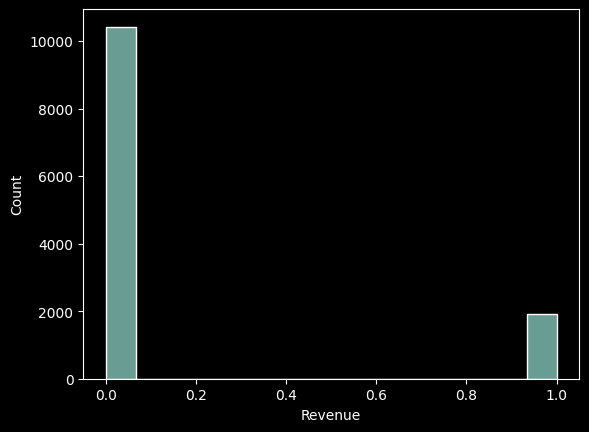

In [ ]:
sns.histplot(df['Revenue'])

При обучении модели может возникнуть сложность, из-за того, что кол-во покупок сильно ниже, чем кол-во отказов от покупки.

In [ ]:
import polars as pl

In [ ]:
df_big = df.copy()

for _ in range(100):
  df_big = pd.concat([df_big, df])

In [ ]:
len(df_big)

1245330

In [ ]:
df_big.to_csv('shoppers_big.csv', index=False)

In [ ]:
%%time
df = pd.read_csv('shoppers_big.csv')

CPU times: user 2.85 s, sys: 119 ms, total: 2.97 s
Wall time: 3.04 s


In [ ]:
%%time
df_pl = pl.read_csv('shoppers_big.csv')

CPU times: user 1.65 s, sys: 442 ms, total: 2.1 s
Wall time: 1.78 s


In [ ]:
%%time
df.query('Revenue == True')

CPU times: user 43.3 ms, sys: 0 ns, total: 43.3 ms
Wall time: 47.4 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3,87.833333,0,0.00,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
101,4,61.000000,0,0.00,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True,True
188,9,111.500000,1,48.50,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False,True
196,2,56.000000,1,144.00,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245272,6,133.466667,0,0.00,44,2664.445833,0.002041,0.010884,97.860836,0.0,Nov,2,2,1,3,Returning_Visitor,True,True
1245276,7,139.575000,0,0.00,30,986.500000,0.000000,0.011429,36.392861,0.0,Dec,2,10,1,2,New_Visitor,False,True
1245311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
1245312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True


In [ ]:
%%time
df_pl.filter(pl.col('Revenue') == True)

CPU times: user 29.8 ms, sys: 45.2 ms, total: 75 ms
Wall time: 42.6 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
3,87.833333,0,0.0,27,798.333333,0.0,0.012644,22.916036,0.8,"""Feb""",2,2,3,1,"""Returning_Visitor""",false,true
10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,"""Feb""",2,6,1,2,"""Returning_Visitor""",false,true
4,61.0,0,0.0,19,607.0,0.0,0.026984,17.535959,1.0,"""Feb""",1,1,7,4,"""Returning_Visitor""",true,true
9,111.5,1,48.5,49,1868.819697,0.0,0.020709,1.706015,0.0,"""Mar""",2,2,7,2,"""Returning_Visitor""",false,true
2,56.0,1,144.0,67,2563.783333,0.0,0.005797,19.34265,0.0,"""Mar""",2,2,4,2,"""New_Visitor""",false,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6,133.466667,0,0.0,44,2664.445833,0.002041,0.010884,97.860836,0.0,"""Nov""",2,2,1,3,"""Returning_Visitor""",true,true
7,139.575,0,0.0,30,986.5,0.0,0.011429,36.392861,0.0,"""Dec""",2,10,1,2,"""New_Visitor""",false,true
1,0.0,2,211.25,144,4627.489571,0.001361,0.020664,0.0,0.0,"""Nov""",2,2,1,2,"""Returning_Visitor""",false,true


In [ ]:
%%time
df.groupby('Weekend', as_index=False).agg(revenue_cnt=('Revenue', 'sum'))

CPU times: user 47.6 ms, sys: 0 ns, total: 47.6 ms
Wall time: 44.3 ms


,Weekend,revenue_cnt
0,False,142309
1,True,50399


In [ ]:
%%time
df.groupby(['Weekend', 'TrafficType'], as_index=False).agg(revenue_cnt=('Revenue', 'sum')).head()

CPU times: user 120 ms, sys: 0 ns, total: 120 ms
Wall time: 261 ms


,Weekend,TrafficType,revenue_cnt
0,False,1,19594
1,False,2,63428
2,False,3,14342
3,False,4,11918
4,False,5,4444


In [ ]:
%%time
df_pl.group_by('Weekend').agg(pl.col('Revenue').sum())

CPU times: user 33.1 ms, sys: 3.8 ms, total: 36.9 ms
Wall time: 43.4 ms


Weekend,Revenue
bool,u32
true,50399
false,142309


In [ ]:
%%time
df_pl.group_by(['Weekend', 'TrafficType']).agg(pl.col('Revenue').sum()).head()

CPU times: user 164 ms, sys: 191 ms, total: 356 ms
Wall time: 211 ms


Weekend,TrafficType,Revenue
bool,i64,u32
true,4,4747
true,9,404
true,17,0
false,18,0
false,15,0


**Polars быстрее чем Pandas выполняет операции**